Running SVM from scikit learn - to predict the delirium outcome from functional connectivity edges (across the entire brain)

Note - need to select appropriate environment for running scikit learn from 
source sklearn-env/bin/activate

Location of scikit-learn
/Users/ntaylor/sklearn-env/lib/python3.12/site-packages

In [4]:
import numpy as np
import pandas as pd


In [2]:
# Load data from CSV file
# Load your connectivity data
# Assuming X is an n_subjects x n_connections matrix (connectivity features) 
# and y is a vector of labels (delirium: 1 for yes, 0 for no)
file_path = "/Users/ntaylor/Library/CloudStorage/OneDrive-TheUniversityofSydney(Staff)/Postdoc_Rob/Analysis/Graph_Theory/schaef_400/FC/flat_fc_edges_all_subjects.csv"
X = pd.read_csv(file_path, header=None, sep=",")

clinic_data = pd.read_csv("/Users/ntaylor/Library/CloudStorage/OneDrive-TheUniversityofSydney(Staff)/Postdoc_Rob/Analysis/Demographic_Data/subject_data_IL810_mri.csv", header=0, sep=",")
y = clinic_data[['bin_delirium']]

Train the Support Vector Machine:
In order to interpret the wegiths, best to run with a linear kernel

In [5]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

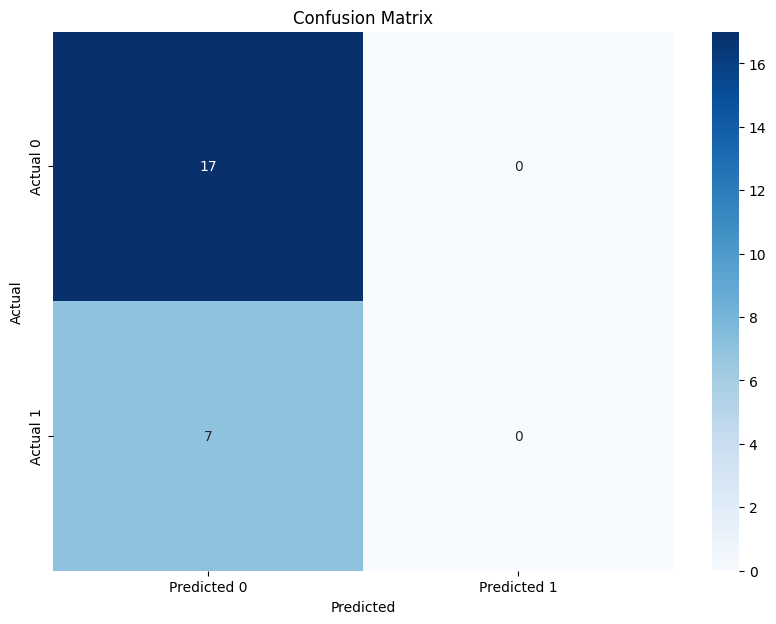

Accuracy of balanced SVM: 0.7083333333333334
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        17
           1       0.00      0.00      0.00         7

    accuracy                           0.71        24
   macro avg       0.35      0.50      0.41        24
weighted avg       0.50      0.71      0.59        24

[[17  0]
 [ 7  0]]


/Users/ntaylor/sklearn-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ntaylor/sklearn-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ntaylor/sklearn-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [4]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Scale features (SVMs work better with scaled data)
# Ensure y_train and y_test are 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize and train the SVM model
svm_balanced = SVC(kernel='linear', class_weight='balanced', random_state=42)  # Use linear kernel for interpretability
svm_balanced.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_balanced.predict(X_test_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics
print("Accuracy of balanced SVM:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

See the above confusion matrix is showing a large proportion of data is being incorrectly classified (7 delirious participants are not being classified as delirious)

In a weighted linear SVM, the minority class should typically be weighted more to ensure that the model pays more attention to it during training. This helps improve the model's performance on the minority class, which might otherwise be overlooked due to its smaller representation in the dataset.

Below we are plotting the decision boundaries for both the non-weighted and the weighted classifiers for comparison

ValueError: n_features must be equal to 2. Got 125751 instead.

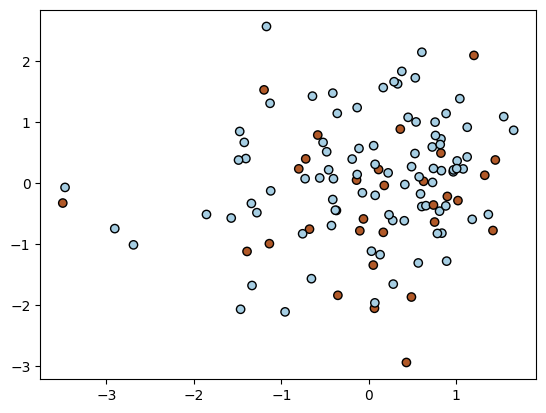

In [18]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

# # Scale features (SVMs work better with scaled data)
y_extract = y.values.ravel()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# fit the model and get the separating hyperplane
clf = SVC(kernel="linear", C=1.0, random_state=42)
clf.fit(X_scaled, y_extract)

# fit the model and get the separating hyperplane using weighted classes
wclf = SVC(kernel="linear", class_weight= {0: 1, 1: 10}, random_state=42)
wclf.fit(X_scaled, y_extract)

# plot the samples
plt.scatter(X_scaled[:, 0], X_scaled[:, 100], c=y_extract, cmap=plt.cm.Paired, edgecolors="k")

# plot the decision functions for both classifiers
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X_scaled,
    plot_method="contour",
    colors="k",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

# plot decision boundary and margins for weighted classes
wdisp = DecisionBoundaryDisplay.from_estimator(
    wclf,
    X_scaled,
    plot_method="contour",
    colors="r",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

plt.legend(
    [
        mlines.Line2D([], [], color="k", label="non weighted"),
        mlines.Line2D([], [], color="r", label="weighted"),
    ],
    ["non weighted", "weighted"],
    loc="upper right",
)
plt.show()

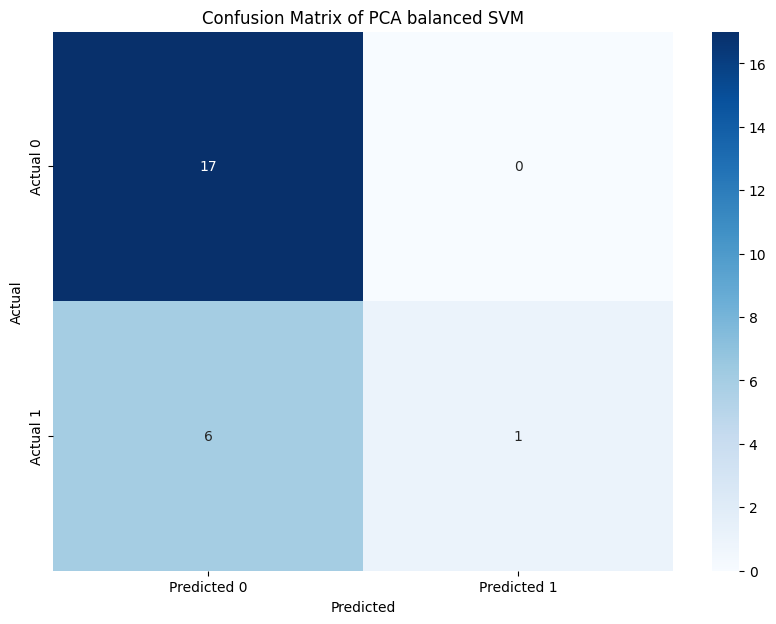

Accuracy of balanced SVM:               precision    recall  f1-score   support

           0       0.74      1.00      0.85        17
           1       1.00      0.14      0.25         7

    accuracy                           0.75        24
   macro avg       0.87      0.57      0.55        24
weighted avg       0.82      0.75      0.67        24



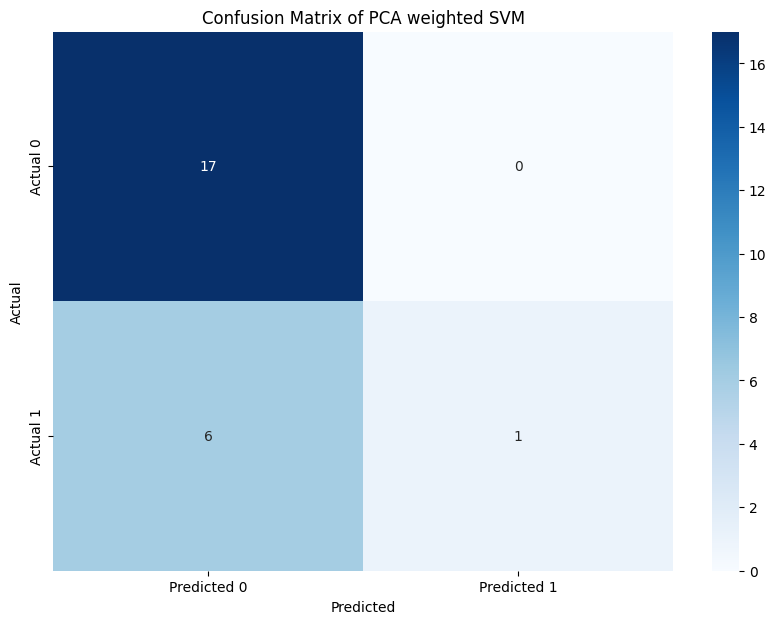

Accuracy of weighted SVM:               precision    recall  f1-score   support

           0       0.74      1.00      0.85        17
           1       1.00      0.14      0.25         7

    accuracy                           0.75        24
   macro avg       0.87      0.57      0.55        24
weighted avg       0.82      0.75      0.67        24



In [17]:
## Attempts to reduce dimensionality first with a PCA
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (SVMs work better with scaled data)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize and train the SVM model with balanced class weights
svm_balanced = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_balanced.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = svm_balanced.predict(X_test_pca)

# Compute the confusion matrix
cm1 = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of PCA balanced SVM')
plt.show()
print("Accuracy of balanced SVM:", classification_report(y_test, y_pred))

# Fit the model and get the separating hyperplane
clf = SVC(kernel="linear", C=1.0, random_state=42)
clf.fit(X_train_pca, y_train)

# Fit the model and get the separating hyperplane using weighted classes
wclf = SVC(kernel="linear",class_weight={0: 1, 1: 3}, random_state=42)
wclf.fit(X_train_pca, y_train)
# Predict on the test set for the weighted classes
y_pred2 = wclf.predict(X_test_pca)


# Plot the samples
#plt.scatter(X_train_pca[:, 100], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors="k")

# Compute the confusion matrix
cm2 = confusion_matrix(y_test, y_pred2)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of PCA weighted SVM')
plt.show()

# Print classification report
print("Accuracy of weighted SVM:", classification_report(y_test, y_pred2))


Attempt to plot out multiple different SVMs

TypeError: Unable to find the number of features from X of type numpy.ndarray with shape (120,)

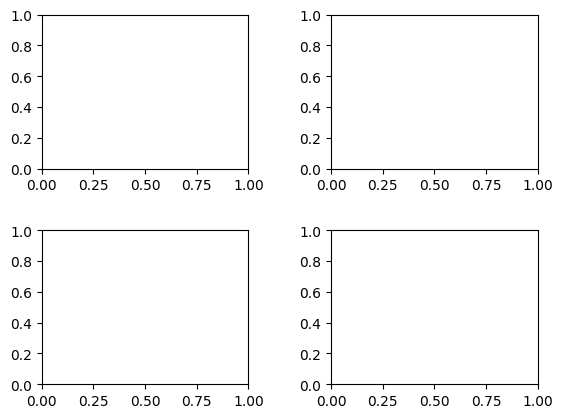

In [21]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X_scaled, y_extract) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_scaled[:, 0], X_scaled[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_scaled[:,0],
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

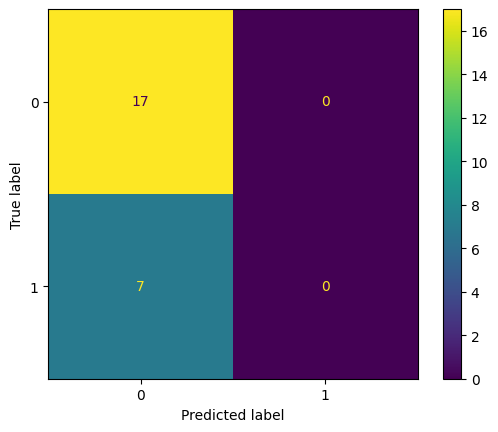

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Scale features (SVMs work better with scaled data)
# Ensure y_train and y_test are 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize and train the SVM model
svm_balanced = SVC(kernel='linear', class_weight='balanced', random_state=42)  # Use linear kernel for interpretability
svm_balanced.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_balanced.predict(X_test_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)


clf = SVC(random_state=0)
clf.fit(X_train_scaled, y_train)
SVC(random_state=0)
predictions = clf.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()

WEIGHTED SVM

Best parameters: {'class_weight': {0: 1, 1: 1}}


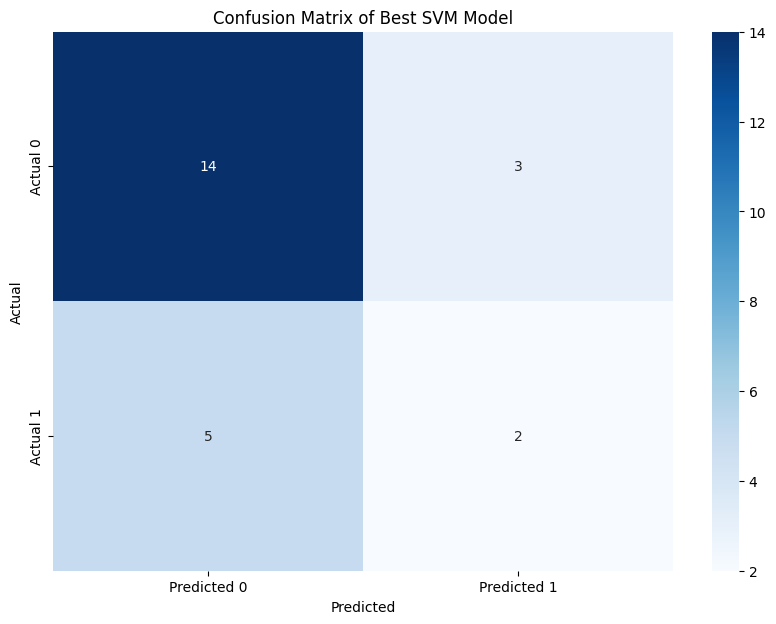

Accuracy of best SVM: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        17
           1       0.40      0.29      0.33         7

    accuracy                           0.67        24
   macro avg       0.57      0.55      0.56        24
weighted avg       0.64      0.67      0.65        24



In [18]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (SVMs work better with scaled data)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Fit the model and get the separating hyperplane using weighted classes
wclf = SVC(kernel="linear",class_weight={0: 1, 1: 3}, random_state=42)
wclf.fit(X_train_pca, y_train)
# Predict on the test set for the weighted classes
y_pred2 = wclf.predict(X_test_pca)

# Define the grid of hyperparameters
param_grid = {'class_weight': [{0: 1, 1: w} for w in range(1, 10)]}
grid_search = GridSearchCV(SVC(kernel='linear', random_state=42), param_grid, scoring='f1')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Best SVM Model')
plt.show()

# Print classification report
print("Accuracy of best SVM:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best parameters: {'class_weight': {0: 1, 1: 4}}


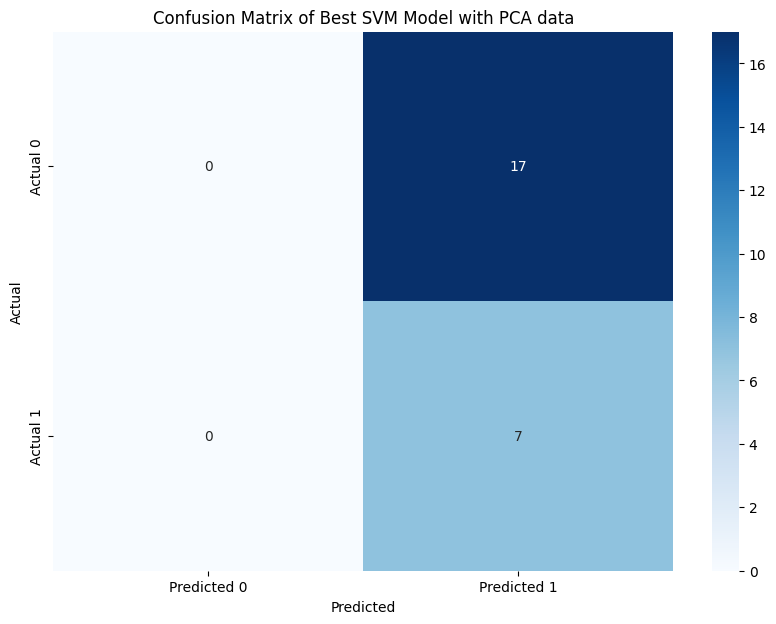

Accuracy of best SVM: 0.2916666666666667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.29      1.00      0.45         7

    accuracy                           0.29        24
   macro avg       0.15      0.50      0.23        24
weighted avg       0.09      0.29      0.13        24



/Users/ntaylor/sklearn-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ntaylor/sklearn-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ntaylor/sklearn-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
# Split data into train and test - PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (SVMs work better with scaled data)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define the grid of hyperparameters
param_grid = {'class_weight': [{0: 1, 1: w} for w in range(1, 10)]}
grid_search = GridSearchCV(SVC(kernel='linear', random_state=42), param_grid, scoring='f1')
grid_search.fit(X_train_pca, y_train)

print("Best parameters:", grid_search.best_params_)

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_pca)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Best SVM Model with PCA data')
plt.show()

# Print classification report
print("Accuracy of best SVM:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

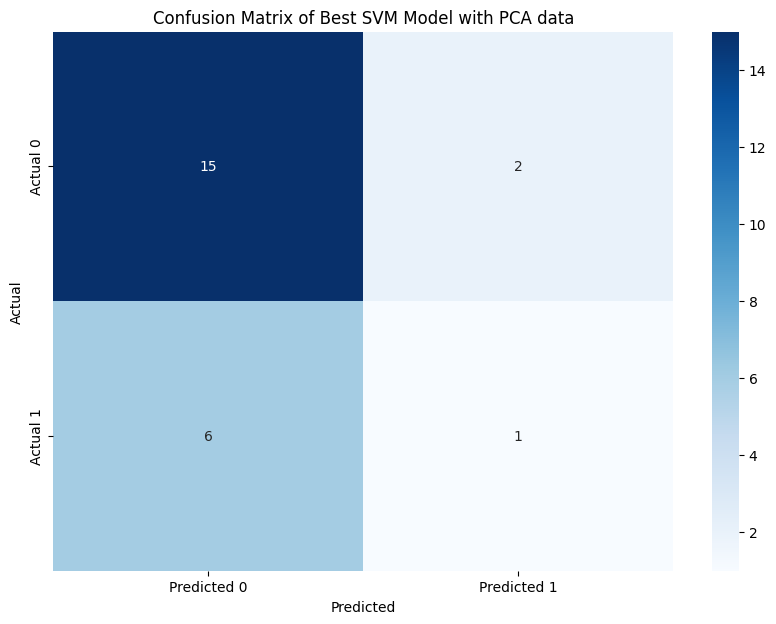

Accuracy of best SVM: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.71      0.88      0.79        17
           1       0.33      0.14      0.20         7

    accuracy                           0.67        24
   macro avg       0.52      0.51      0.49        24
weighted avg       0.60      0.67      0.62        24



In [30]:
# Initialize and train the SVM model
svm_weight_pca = SVC(kernel='linear',class_weight={0:1,1:3.2}, random_state=42)  # Use linear kernel for interpretability
svm_weight_pca.fit(X_train_pca, y_train)

y_pred = svm_weight_pca.predict(X_test_pca)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Best SVM Model with PCA data')
plt.show()

# Print classification report
print("Accuracy of best SVM:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

SMOTE method for resampling - as there's an imbalance

Class distribution after SMOTE: Counter({'bin_delirium': 1})


/Users/ntaylor/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.75      1.00      0.86        18
           1       0.00      0.00      0.00         6

    accuracy                           0.75        24
   macro avg       0.38      0.50      0.43        24
weighted avg       0.56      0.75      0.64        24

Accuracy of smmote: 0.75


/Users/ntaylor/sklearn-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ntaylor/sklearn-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ntaylor/sklearn-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


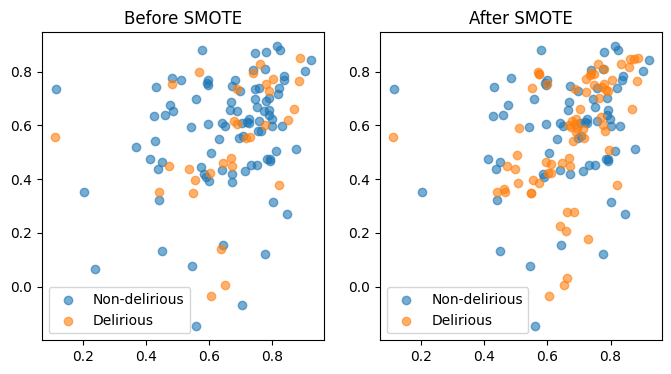

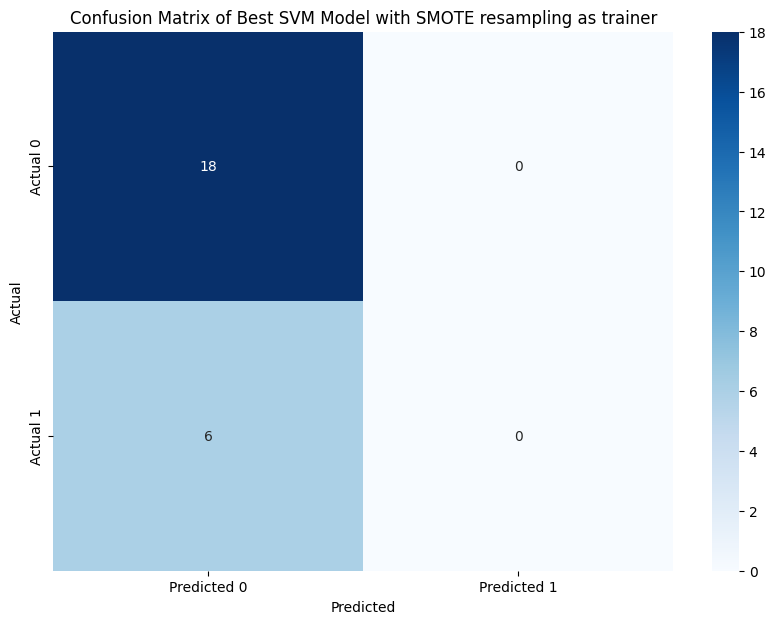

In [40]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#y_train = y_train.values.ravel()
#y_test = y_test.values.ravel()
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
#visualize the redistribution of the classes
# Visualize original data distribution
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[y.values.ravel() == 0].iloc[:, 0], X[y.values.ravel() == 0].iloc[:, 1], label="Non-delirious", alpha=0.6)
plt.scatter(X[y.values.ravel() == 1].iloc[:, 0], X[y.values.ravel() == 1].iloc[:, 1], label="Delirious", alpha=0.6)
plt.title("Before SMOTE")
plt.legend()
# Visualize new data distribution
plt.subplot(1, 2, 2)
plt.scatter(X_train_sm[y_train_sm.values.ravel() == 0].iloc[:, 0], X_train_sm[y_train_sm.values.ravel() == 0].iloc[:, 1], label="Non-delirious", alpha=0.6)
plt.scatter(X_train_sm[y_train_sm.values.ravel() == 1].iloc[:, 0], X_train_sm[y_train_sm.values.ravel() == 1].iloc[:, 1], label="Delirious", alpha=0.6)
plt.title("After SMOTE")
plt.legend()

# Check the new class distribution
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_train_sm))

# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_sm, y_train_sm)

# Evaluate the model
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Print evaluation metrics
print("Accuracy of smmote:", accuracy_score(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Best SVM Model with SMOTE resampling as trainer')
plt.show()


/Users/ntaylor/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ntaylor/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ntaylor/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ntaylor/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was e

Best parameters found: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


/Users/ntaylor/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ntaylor/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ntaylor/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ntaylor/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was e

Best parameters found: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


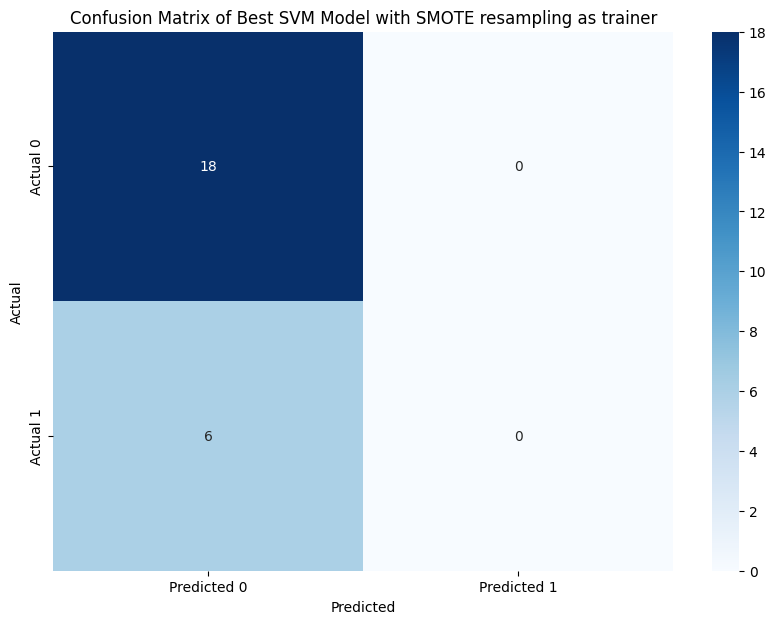

In [41]:
## We need to train the dataset - to get the optimal parameters
from sklearn.model_selection import GridSearchCV
#using the SMOTE data for training and parameter estimation
#find the best gamma parameter
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['rbf'], 'gamma': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train_sm, y_train_sm)

print("Best parameters found:", grid_search.best_params_)
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_test, y_test)

print("Best parameters found:", grid_search.best_params_)
# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
#plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Best SVM Model with SMOTE resampling as trainer')
plt.show()

/Users/ntaylor/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.25      1.00      0.40         6

    accuracy                           0.25        24
   macro avg       0.12      0.50      0.20        24
weighted avg       0.06      0.25      0.10        24

Accuracy of model: 0.25


/Users/ntaylor/sklearn-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ntaylor/sklearn-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ntaylor/sklearn-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


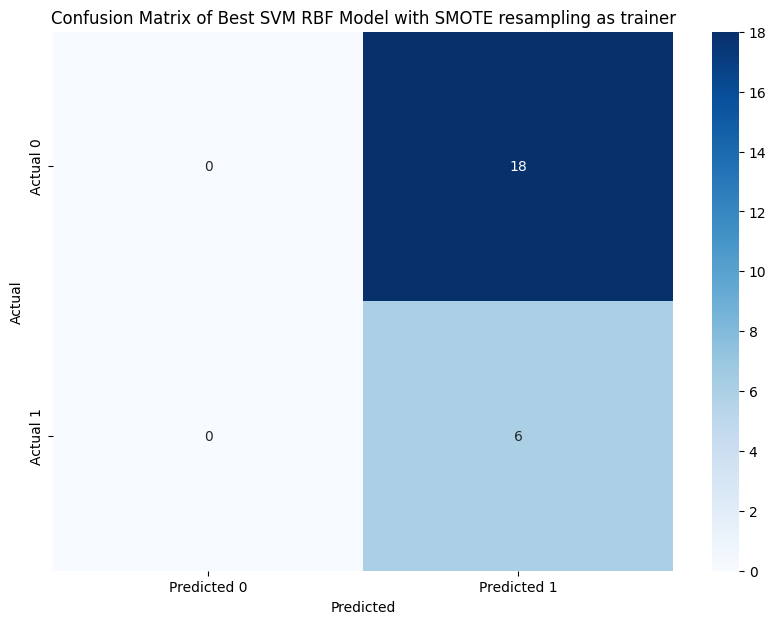

In [ ]:
#Best parameters found: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}

# Train the SVM model
best_svm_model = SVC(kernel='rbf', C=0.1, gamma= 0.1,random_state=42)
best_svm_model.fit(X_train_sm, y_train_sm)

# Evaluate the model
y_pred = best_svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Print evaluation metrics
print("Accuracy of model:", accuracy_score(y_test, y_pred))

# Compute the confusion matrix
cm_best = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Best SVM RBF Model with SMOTE resampling as trainer')
plt.show()


/Users/ntaylor/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ntaylor/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ntaylor/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ntaylor/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was e

Best parameters found: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


/Users/ntaylor/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ntaylor/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ntaylor/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ntaylor/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was e

Best parameters found: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


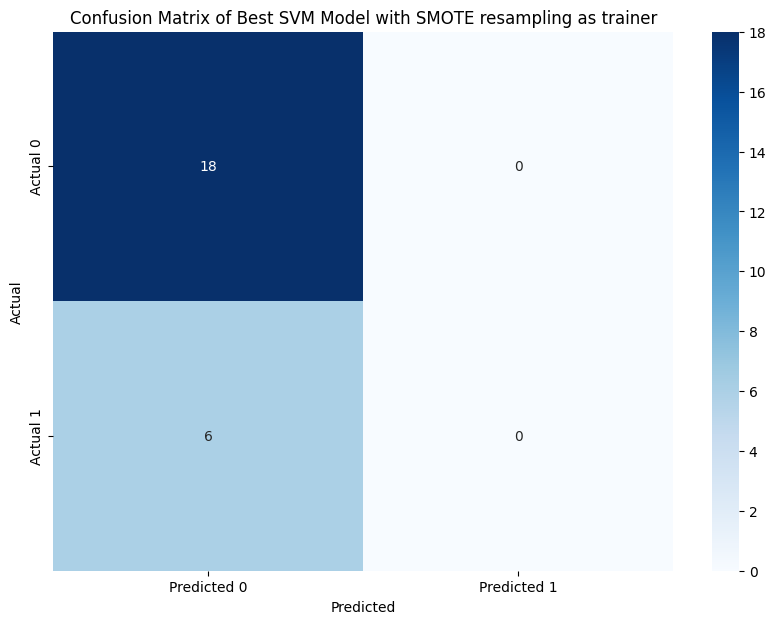

In [46]:
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['rbf'], 'gamma': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_test, y_test)

print("Best parameters found:", grid_search.best_params_)
# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
#plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Best SVM Model with SMOTE resampling as trainer')
plt.show()

Interpret the linear SVM model:
Linear SVM, the coefficients give the importance of each feature (ie., each connection) in predicting the delirium outcome

In [7]:
# Access the learned coefficients (weights) from the linear SVM
importance_weights = svm.coef_

# Optionally, sort them to find the most predictive connections
most_important_connections = np.argsort(importance_weights)[::-1]  # Descending order
print("Most predictive connections:", most_important_connections)

Most predictive connections: [[58446 17981 42193 ... 39667 26603 71358]]


svm.coef_: This gives you the weights (coefficients) of each feature (brain connection). For a linear SVM, the magnitude of the weight indicates how strongly that feature contributes to the prediction.
np.argsort(np.abs(importance_weights)): This sorts the weights by their absolute values in ascending order. Using [::-1] flips it to descending order so you can see the strongest predictive features.
The loop prints out the indices of the top 10 connections with the largest absolute coefficients, which are the most predictive for delirium.
This method helps you identify which functional connections between brain regions are most strongly associated with delirium. If you have a way to map each feature index back to specific brain connections, you can further interpret these results to understand the underlying brain dynamics.

In [8]:
# Access the learned coefficients from the linear SVM
importance_weights = svm.coef_.flatten()  # Flatten in case it's in 2D

# Sort the coefficients by absolute value to find the most important connections
sorted_indices = np.argsort(np.abs(importance_weights))[::-1]  # Sort in descending order

# Print the sorted importance weights and their corresponding feature index
print("Top 10 most predictive connections:")
for i in sorted_indices[:10]:  # Print the top 10 features
    print(f"Connection {i}: Coefficient = {importance_weights[i]}")

Top 10 most predictive connections:
Connection 71358: Coefficient = 0.0004970246693475944
Connection 58446: Coefficient = -0.00048389958222817494
Connection 17981: Coefficient = -0.00043964726550779374
Connection 42193: Coefficient = -0.0004326951189166608
Connection 73720: Coefficient = -0.00042521519555501776
Connection 26603: Coefficient = 0.0004219889393041747
Connection 39667: Coefficient = 0.0004156931122891445
Connection 45342: Coefficient = -0.00041400391084089373
Connection 26719: Coefficient = -0.0004107130058204113
Connection 58448: Coefficient = -0.00040942378691731973


- smaller predictive power : these features may not be strongly correlated with the target variable
- dataset is noisy, so no features are informative or are not standing out

Regularization Effect (C-Parameter)
trade-off between maximizing the margin and minimizing classification error:

High regularization (low c) - small c tries to prevent overfitting

Low regularization (high-c) - high c value, still getting small coefficients, it could indicate that the features have weak predictive power


In [9]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'C': 0.1, 'kernel': 'rbf'}


In [11]:
#find the best gamma parameter
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['rbf'], 'gamma': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found:", grid_search.best_params_)
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Best parameters found: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


Need to get the Radial Basis Function Kernel to work - as this is supposed to be the better kernel for predicting this dataset for fc edges

Likely - co-linearity occurring, as high-dimensional datasets like functional connectivity matrices, where many connections may convey similar information
Try reducing the multicollinearity using a dimensionality reduction technique - like PCA

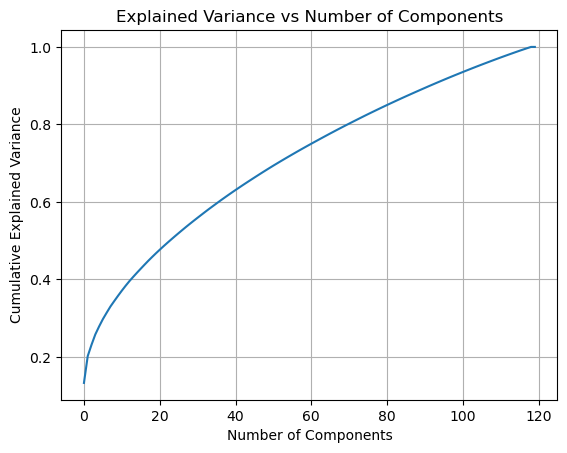

Number of components explaining 80% of the variance: 71


In [13]:
# try reducing the dimensionality of the FC features using PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit PCA to the data
pca = PCA()
pca.fit(X)

# Calculate cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.plot(explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.show()

# Find the number of components that explain 95% of the variance
n_components = np.argmax(explained_variance >= 0.80) + 1
print(f"Number of components explaining 80% of the variance: {n_components}")

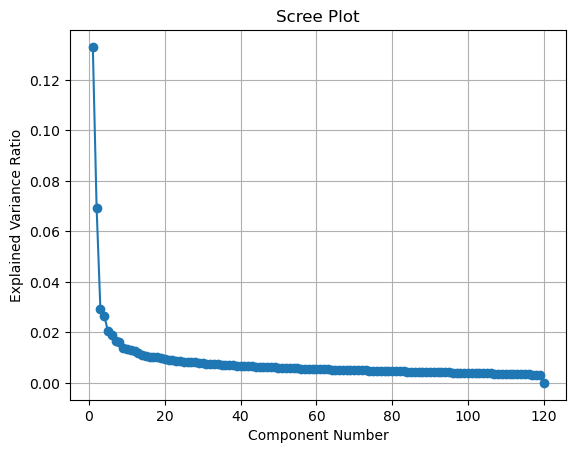

In [14]:
# Plot the explained variance for each component (Scree plot)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)  # Reduce to 10 components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
# Re-train the SVM with the best C value
best_svm = SVC(kernel='linear', C=0.1)  # Best C found is 0.1
best_svm.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = best_svm.predict(X_test_pca) #the X- data expressed with 10 components

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


print(confusion_matrix(y_test, y_pred))


# Access the learned coefficients from the re-trained SVM
importance_weights = best_svm.coef_.flatten()

# Sort by the absolute value of the weights to find the most important connections
sorted_indices = np.argsort(np.abs(importance_weights))[::-1]

# Print the most predictive connections
print("Top 10 most predictive connections with C=0.1:")
for i in sorted_indices[:10]:
    print(f"Component {i}: Coefficient = {importance_weights[i]}")


Accuracy: 0.7708333333333334
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        37
           1       0.00      0.00      0.00        11

    accuracy                           0.77        48
   macro avg       0.39      0.50      0.44        48
weighted avg       0.59      0.77      0.67        48

[[37  0]
 [11  0]]
Top 10 most predictive connections with C=0.1:
Component 2: Coefficient = -5.099117077082025e-07
Component 1: Coefficient = 4.777967748501028e-07
Component 0: Coefficient = 2.478830140137995e-07


c:\Users\natas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\natas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\natas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Running SVM on average within and across networks

In [36]:
file_path = "/Users/ntaylor/Library/CloudStorage/OneDrive-TheUniversityofSydney(Staff)/Postdoc_Rob/Analysis/Graph_Theory/schaef_400/FC/avg_within_across_cort_networks.csv"
X = pd.read_csv(file_path, header=None, sep=",")

clinic_data = pd.read_csv("/Users/ntaylor/Library/CloudStorage/OneDrive-TheUniversityofSydney(Staff)/Postdoc_Rob/Analysis/Demographic_Data/subject_data_IL810_mri.csv", header=0, sep=",")
y = clinic_data[['bin_delirium']]


Linear SVM on Avg. within/across Cortical Network Connections

Accuracy: 0.6875
              precision    recall  f1-score   support

           0       0.82      0.76      0.79        37
           1       0.36      0.45      0.40        11

    accuracy                           0.69        48
   macro avg       0.59      0.61      0.59        48
weighted avg       0.72      0.69      0.70        48

[[28  9]
 [ 6  5]]


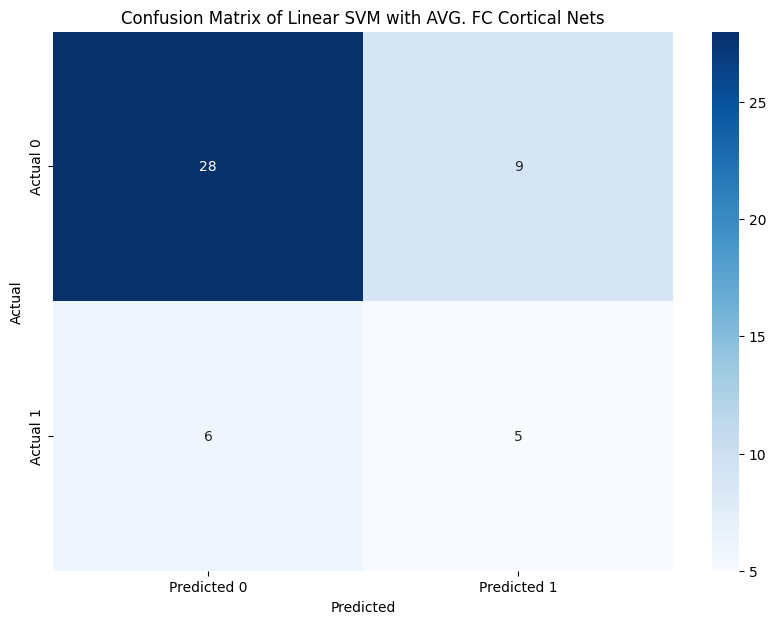

In [6]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
# Scale features (SVMs work better with scaled data)
# Ensure y_train and y_test are 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM model
svm = SVC(kernel='linear')  # Use linear kernel for interpretability
svm.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm.predict(X_test_scaled)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
#plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Linear SVM with AVG. FC Cortical Nets')
plt.show()

Parameter fitting for the above SVM - probably best to run a weight version

Accuracy: 0.6041666666666666
              precision    recall  f1-score   support

           0       0.80      0.65      0.72        37
           1       0.28      0.45      0.34        11

    accuracy                           0.60        48
   macro avg       0.54      0.55      0.53        48
weighted avg       0.68      0.60      0.63        48

[[24 13]
 [ 6  5]]


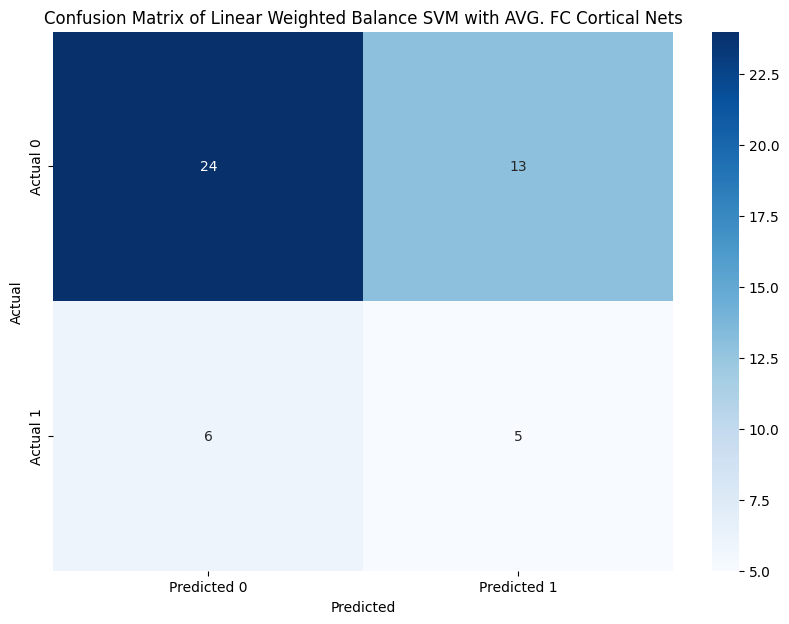

In [8]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
# Scale features (SVMs work better with scaled data)
# Ensure y_train and y_test are 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM model
svm = SVC(kernel='linear', class_weight='balanced')  # Use linear kernel for interpretability
svm.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm.predict(X_test_scaled)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
#plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Linear Weighted Balance SVM with AVG. FC Cortical Nets')
plt.show()

Try Setting different iterations for the weight version of the SVM

Best parameters: {'class_weight': {0: 1, 1: 4}}
Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.84      0.43      0.57        37
           1       0.28      0.73      0.40        11

    accuracy                           0.50        48
   macro avg       0.56      0.58      0.49        48
weighted avg       0.71      0.50      0.53        48

[[16 21]
 [ 3  8]]


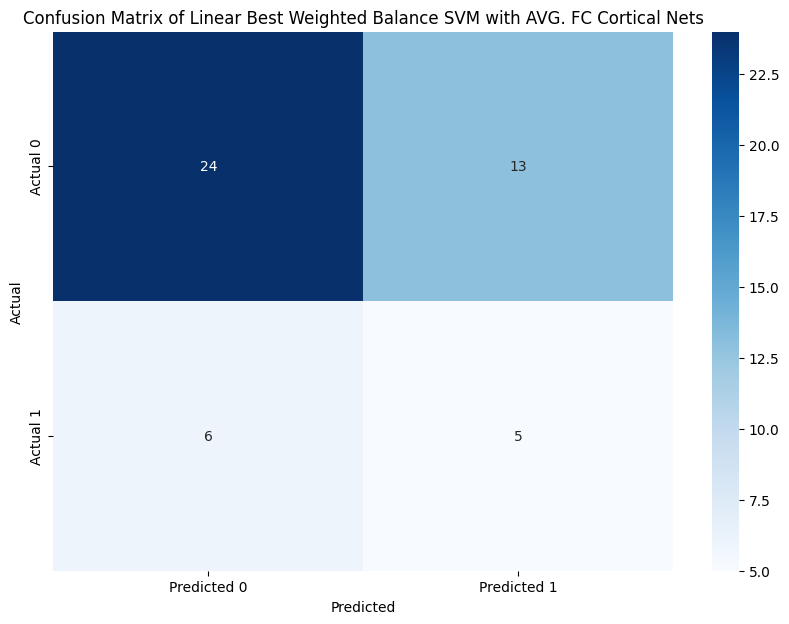

In [10]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters
param_grid = {'class_weight': [{0: 1, 1: w} for w in range(1, 10)]}
grid_search = GridSearchCV(SVC(kernel='linear', random_state=42), param_grid, scoring='f1')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
#plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Linear Best Weighted Balance SVM with AVG. FC Cortical Nets')
plt.show()


After selecting best performing weighted SVM

Accuracy: 0.6458333333333334
              precision    recall  f1-score   support

           0       0.81      0.70      0.75        37
           1       0.31      0.45      0.37        11

    accuracy                           0.65        48
   macro avg       0.56      0.58      0.56        48
weighted avg       0.70      0.65      0.67        48

[[26 11]
 [ 6  5]]


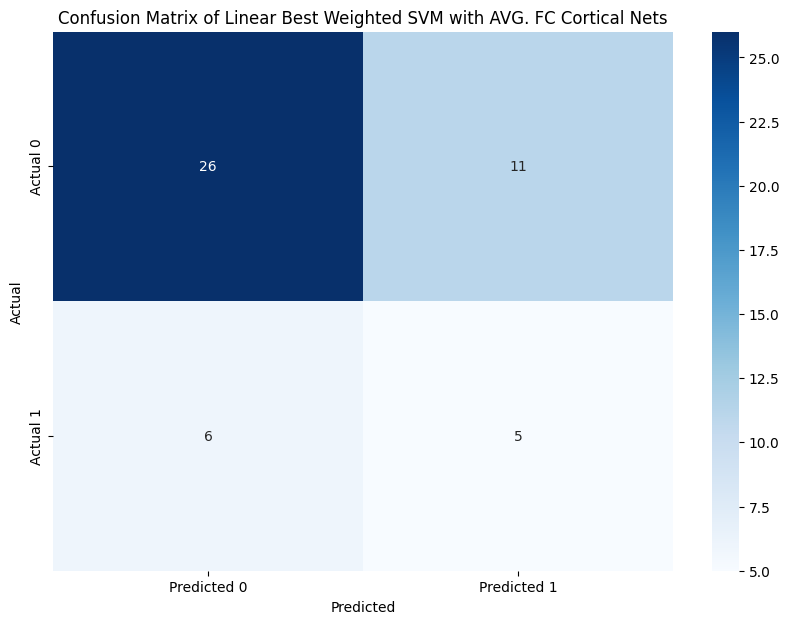

In [13]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
# Scale features (SVMs work better with scaled data)
# Ensure y_train and y_test are 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM model
svm = SVC(kernel='linear', class_weight={0: 1, 1: 1.5})  # Use linear kernel for interpretability
svm.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm.predict(X_test_scaled)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
#plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Linear Best Weighted SVM with AVG. FC Cortical Nets')
plt.show()

In [17]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'class_weight': ['balanced', None]
}
#scoring based on the overall accuracy
grid_search = GridSearchCV(svm, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found:", grid_search.best_params_)

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)



Best parameters found: {'C': 0.1, 'class_weight': None, 'kernel': 'rbf'}


Accuracy: 0.7708333333333334
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        37
           1       0.00      0.00      0.00        11

    accuracy                           0.77        48
   macro avg       0.39      0.50      0.44        48
weighted avg       0.59      0.77      0.67        48

[[37  0]
 [11  0]]


/Users/ntaylor/sklearn-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ntaylor/sklearn-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ntaylor/sklearn-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


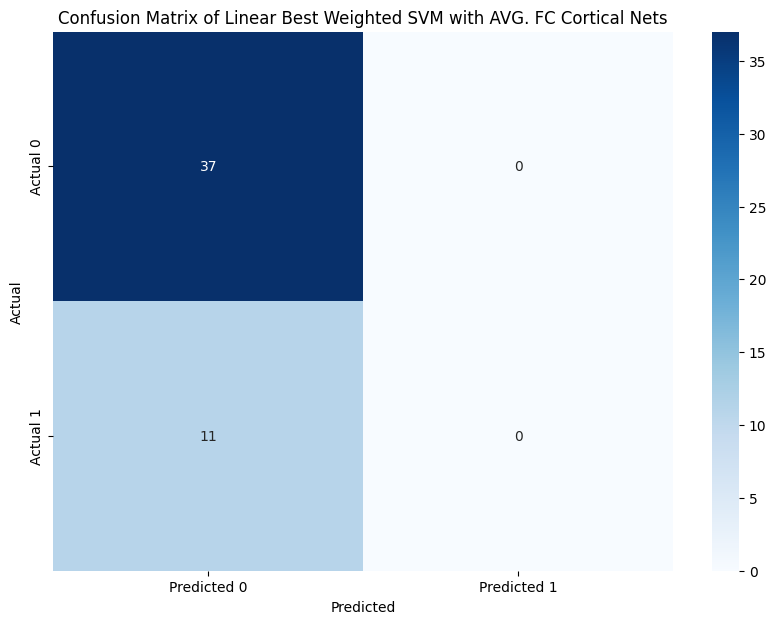

In [18]:
y_pred_best = best_model.predict(X_test_scaled)
# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
#plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Linear Best Weighted SVM with AVG. FC Cortical Nets')
plt.show()

Note - this is not the best prediction, as it is still saying all the delirious are non-delirious

Final Simple Model for Predicting Delirium from Avg. FC Networks

Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.82      0.73      0.77        37
           1       0.33      0.45      0.38        11

    accuracy                           0.67        48
   macro avg       0.58      0.59      0.58        48
weighted avg       0.71      0.67      0.68        48

[[27 10]
 [ 6  5]]


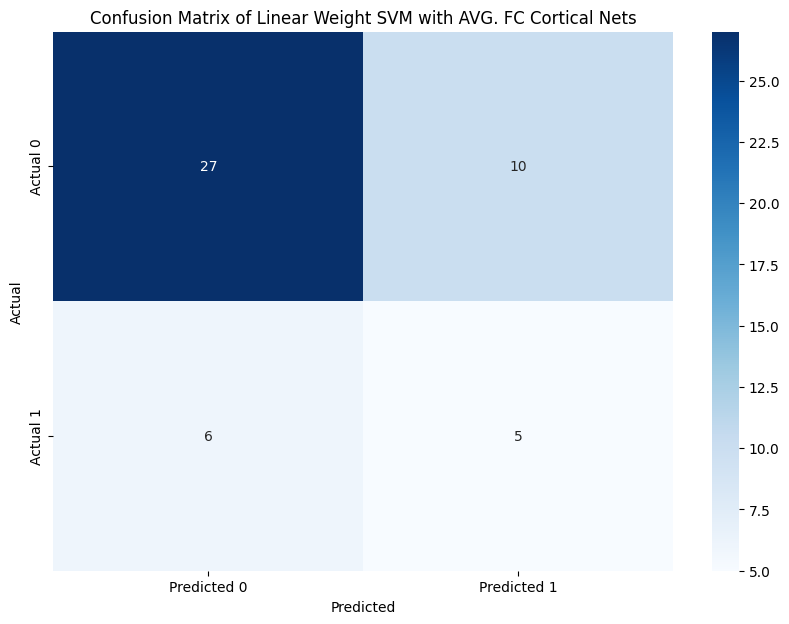

In [47]:
#Best parameters found: {'C': 0.1, 'class_weight': None, 'kernel': 'rbf'}

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
# Scale features (SVMs work better with scaled data)
# Ensure y_train and y_test are 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM model
svm = SVC(kernel='linear', C=0.1, class_weight='balanced')  # Use linear kernel for interpretability
svm.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm.predict(X_test_scaled)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
#plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Linear Weight SVM with AVG. FC Cortical Nets')
plt.show()


In [ ]:
# Assuming you have an array with shape (1, 121)
# Reshape the array to (11, 11)
#weight_rearrange = importance_weights.reshape(11, 11) - include subcortex
weight_rearrange = importance_weights.reshape(8, 8)
#print(weight_rearrange)

#name rows and columns
#columns = ['Visual','Somato-motor','Dors-atten','SalVent-atten','Limbic','Control','Default','Temp-parietal','Subcortex','Cerebellum','AAS Nuclei']
columns = ['Visual','Somato-motor','Dors-atten','SalVent-atten','Limbic','Control','Default','Temp-parietal']
#rename columns and rows of weight_rearrange
weight_rearrange = pd.DataFrame(weight_rearrange, columns=columns, index=columns)

Generate Plot

In [ ]:
# generate a heatmap plot of weight_rearrange
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
import numpy as np


# Define a custom colormap
colors = [(0, '#c80064'), (0.4,'#df979e'), (0.5, 'white'),(0.8,'#64caca'), (1, '#003366')]  # pink to white to blue
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Create a heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(weight_rearrange, annot=True, cmap=custom_cmap, cbar=True, center=0,)

# Add title and labels
plt.title('Weight Coeff. from SVM Model')
plt.xlabel('Networks')
plt.ylabel('Networks')

# Save the plot as an .svg file
plt.savefig('C:\\Users\\natas\\OneDrive - The University of Sydney (Staff)\\Postdoc_Rob\\Analysis\\Graph_Theory\\schaef_400\\FC\\weight_coeffs_svm_within_across_nets.svg', format='svg')
# Show the plot
plt.show()

Next Step - keep it simple with a slight weighting and additional features

Additional Features: Need Age + Cognition Scores

In [18]:
file_path = "/Users/ntaylor/Library/CloudStorage/OneDrive-TheUniversityofSydney(Staff)/Postdoc_Rob/Analysis/Graph_Theory/schaef_400/FC/avg_within_across_cort_networks.csv"
X = pd.read_csv(file_path, header=None, sep=",")

clinic_data = pd.read_csv("/Users/ntaylor/Library/CloudStorage/OneDrive-TheUniversityofSydney(Staff)/Postdoc_Rob/Analysis/Demographic_Data/subject_data_IL810_mri.csv", header=0, sep=",")
y = clinic_data[['bin_delirium']]

#loading the cognitive data
cog_data = pd.read_csv("/Users/ntaylor/Library/CloudStorage/OneDrive-TheUniversityofSydney(Staff)/Postdoc_Rob/Analysis/Demographic_Data/mri_cog_update.csv", header=0, sep=",")


Adding the additional age, moca, tmt-diff and dsst score as additional features

In [19]:
# merge the relevant cog data + avg. within network
x2 = cog_data[['patient_age','moca_total','tmt_diff','dsst_score']]

# merge together avg FC within networks + cog and age data
X_features = pd.concat([X, x2], axis=1)

Since there are NaN values in the cognitive feature space - try filling them with the mean of the column

In [23]:
from sklearn.impute import SimpleImputer

# Ensure all column names are strings
X_features.columns = X_features.columns.astype(str)

# Handle NaN values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X_features_imputed = imputer.fit_transform(X_features)

# Round only the values that were NaN and were replaced by imputer
X_features_imputed = np.where(np.isnan(X_features), np.round(X_features_imputed), X_features_imputed)

Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.84      0.70      0.76        37
           1       0.35      0.55      0.43        11

    accuracy                           0.67        48
   macro avg       0.60      0.62      0.60        48
weighted avg       0.73      0.67      0.69        48

[[26 11]
 [ 5  6]]


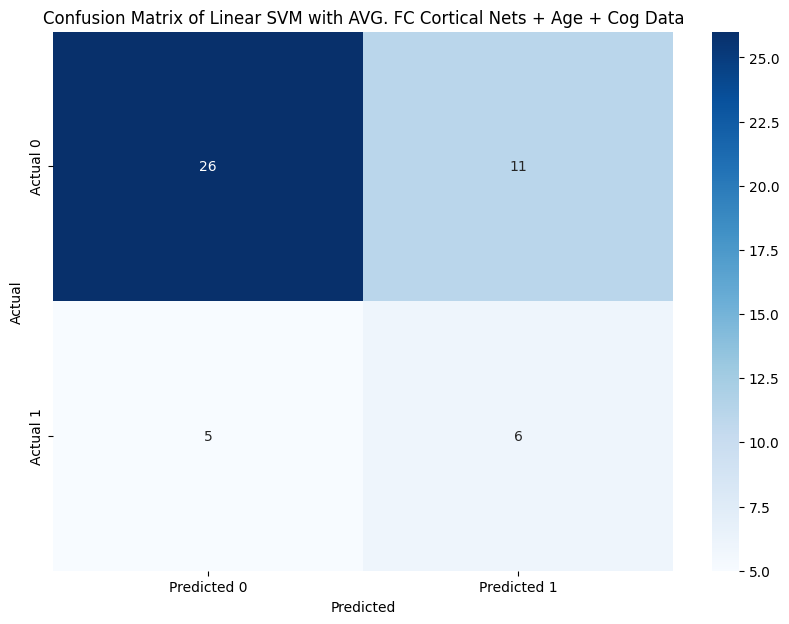

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_features_imputed, y, test_size=0.4, random_state=42)
# Scale features (SVMs work better with scaled data)
# Ensure y_train and y_test are 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM model
svm = SVC(kernel='linear', class_weight={0: 1, 1: 1.5})  # Use linear kernel for interpretability
svm.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm.predict(X_test_scaled)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
#plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Linear SVM with AVG. FC Cortical Nets + Age + Cog Data')
plt.show()

Best parameters: {'class_weight': {0: 1, 1: 5}}
Accuracy: 0.3541666666666667
              precision    recall  f1-score   support

           0       0.88      0.19      0.31        37
           1       0.25      0.91      0.39        11

    accuracy                           0.35        48
   macro avg       0.56      0.55      0.35        48
weighted avg       0.73      0.35      0.33        48

[[ 7 30]
 [ 1 10]]


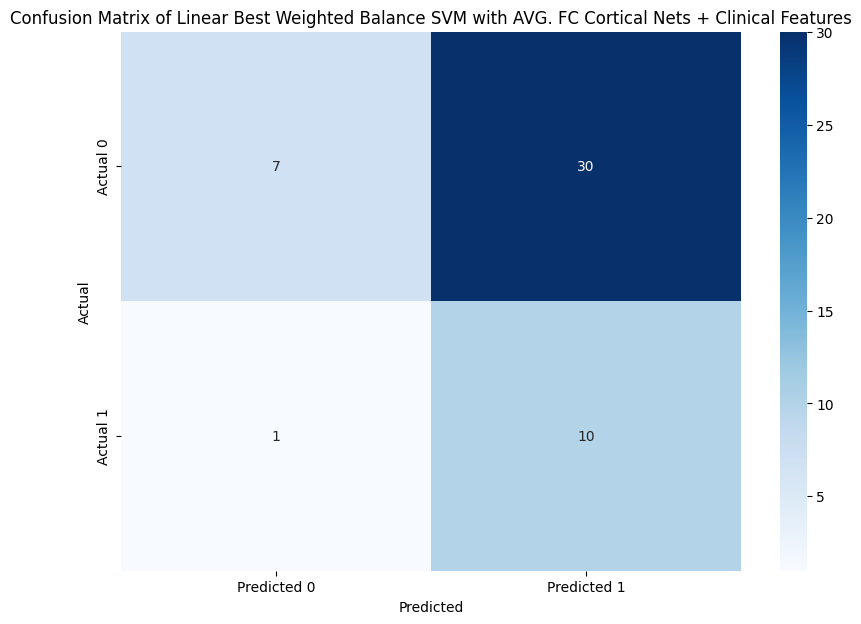

In [30]:
# hyperparameter setting
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters
param_grid = {'class_weight': [{0: 1, 1: w} for w in range(1, 10)]}
grid_search = GridSearchCV(SVC(kernel='linear', random_state=42), param_grid, scoring='f1')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
#plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Linear Best Weighted Balance SVM with AVG. FC Cortical Nets + Clinical Features')
plt.show()

Best parameters found: {'C': 0.1, 'class_weight': None, 'kernel': 'linear'}
Accuracy: 0.6458333333333334
              precision    recall  f1-score   support

           0       0.75      0.81      0.78        37
           1       0.12      0.09      0.11        11

    accuracy                           0.65        48
   macro avg       0.44      0.45      0.44        48
weighted avg       0.61      0.65      0.62        48

[[30  7]
 [10  1]]


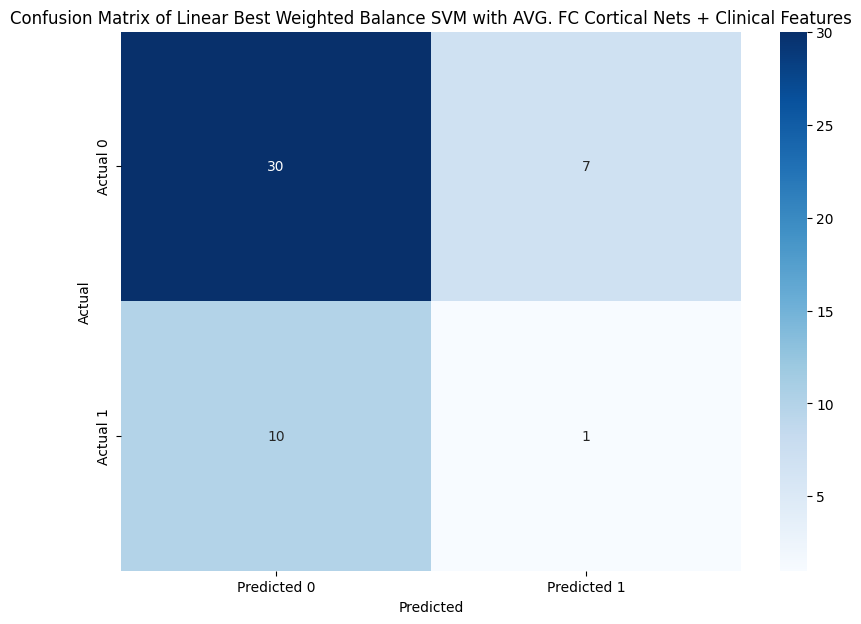

In [29]:
# Selecting other parameters
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear'],
    'class_weight': ['balanced', None]
}
#scoring based on the overall accuracy
grid_search = GridSearchCV(svm, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found:", grid_search.best_params_)

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
#plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Linear Best Weighted Balance SVM with AVG. FC Cortical Nets + Clinical Features')
plt.show()

Best parameters found: {'C': 0.1, 'class_weight': {0: 1, 1: 1}, 'kernel': 'linear'}
Accuracy: 0.6458333333333334
              precision    recall  f1-score   support

           0       0.75      0.81      0.78        37
           1       0.12      0.09      0.11        11

    accuracy                           0.65        48
   macro avg       0.44      0.45      0.44        48
weighted avg       0.61      0.65      0.62        48

[[30  7]
 [10  1]]


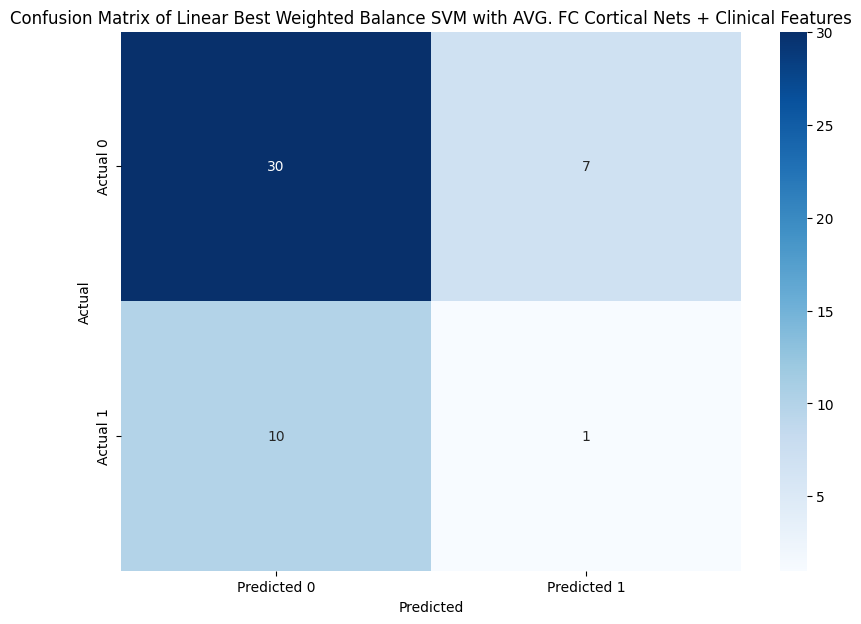

In [32]:
# Selecting other parameters
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear'],
    'class_weight': [{0:1,1:1}, {0:1,1:2}, {0:1,1:3}, {0:1,1:4}, {0:1,1:5}]
}
#scoring based on the overall accuracy
grid_search = GridSearchCV(svm, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found:", grid_search.best_params_)

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
#plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Linear Best Weighted Balance SVM with AVG. FC Cortical Nets + Clinical Features')
plt.show()

In [33]:
# Access the learned coefficients (weights) from the linear SVM
importance_weights = best_model.coef_

# Optionally, sort them to find the most predictive connections
most_important_connections = np.argsort(importance_weights)[::-1]  # Descending order
print("Most predictive connections:", most_important_connections)

Most predictive connections: [[ 9 64 27 29 43 14 49 47 61  3 24 67  6 48 54 57 15 35 28  4 32 58 23 19
  26 45 63 30 51 38 52 36 34 20 17 10 12 33 41 13 11 25 65 40  5 55 62 31
  59 56  7  1  8 50 22 53 46 37 44 18 66 42 21 60 39 16  2  0]]


Accuracy: 0.6875
              precision    recall  f1-score   support

           0       0.84      0.73      0.78        37
           1       0.38      0.55      0.44        11

    accuracy                           0.69        48
   macro avg       0.61      0.64      0.61        48
weighted avg       0.74      0.69      0.71        48

[[27 10]
 [ 5  6]]


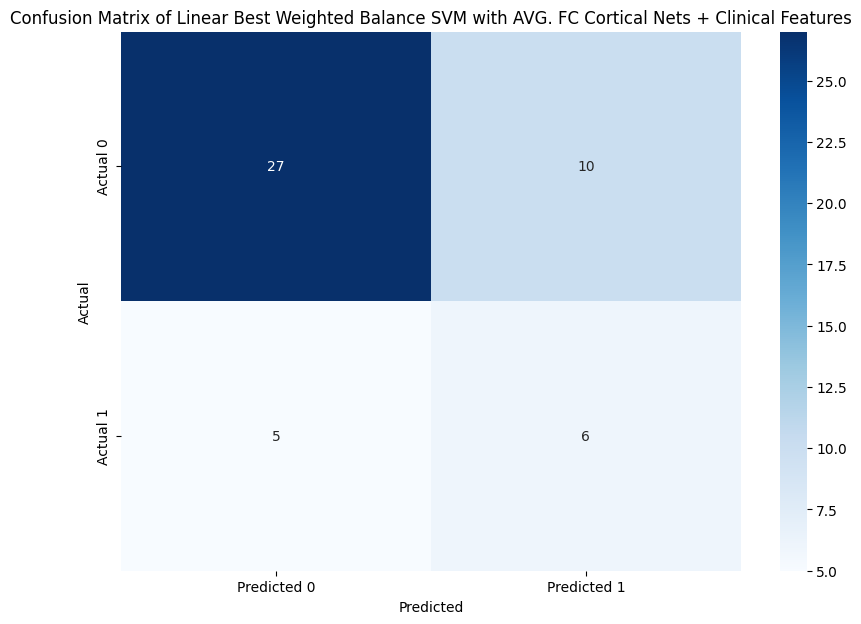

Top 10 most predictive connections with C=0.1:
Connection 9: Coefficient = -0.46223342138441204
Connection 0: Coefficient = 0.40081345780321154
Connection 16: Coefficient = 0.3661713839614543
Connection 2: Coefficient = 0.36617138396145427
Connection 27: Coefficient = -0.3518492951498752
Connection 66: Coefficient = 0.3263908238876641
Connection 64: Coefficient = -0.25647554983759463
Connection 53: Coefficient = 0.20717775120470835
Connection 46: Coefficient = 0.20717775120470822
Connection 42: Coefficient = 0.18718753438387142


In [35]:
# Re-train the SVM with the best C value

best_svm = SVC(kernel='linear', C=0.1,class_weight= {0: 1, 1: 2})  # Best C found is 0.1
best_svm.fit(X_train_scaled, y_train)

y_pred= best_svm.predict(X_test_scaled)
# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
#plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Linear Best Weighted Balance SVM with AVG. FC Cortical Nets + Clinical Features')
plt.show()




# Access the learned coefficients from the re-trained SVM
importance_weights = best_svm.coef_.flatten()


# Sort by the absolute value of the weights to find the most important connections
sorted_indices = np.argsort(np.abs(importance_weights))[::-1]

# Print the most predictive connections
print("Top 10 most predictive connections with C=0.1:")
for i in sorted_indices[:10]:
    print(f"Connection {i}: Coefficient = {importance_weights[i]}")

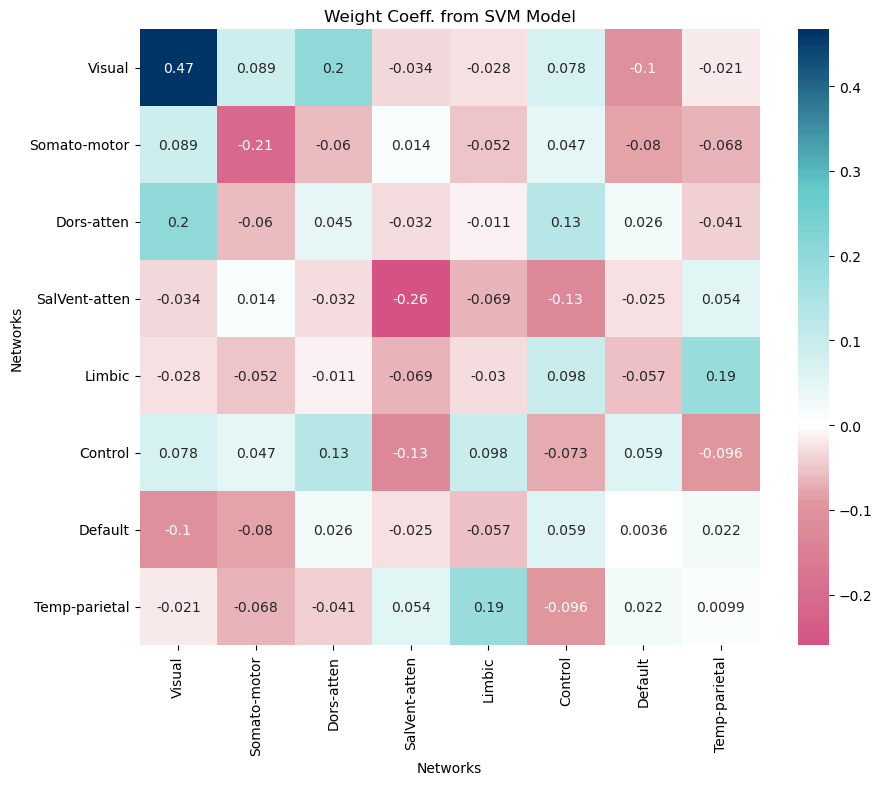

Run the SVM with additional features

In [42]:
# load the data
file_path = "C:\\Users\\natas\\OneDrive - The University of Sydney (Staff)\\Postdoc_Rob\\Analysis\\Graph_Theory\\schaef_400\\FC\\avg_within_across_cort_networks.csv"
fc_edge = pd.read_csv(file_path, header=None, sep=",")

clinic_data = pd.read_csv("C:\\Users\\natas\\OneDrive - The University of Sydney (Staff)\\Postdoc_Rob\\Analysis\\Demographic_Data\\subject_data_IL810_mri.csv", header=0, sep=",")
y = clinic_data[['bin_delirium']]

In [82]:
#feature of interest to add as predictor
#feature_of_interest = clinic_data[['new_nsqip_d']]
#eature_of_interest = clinic_data[['il.8_raw_pod1']]
feature_of_interest = clinic_data[['il8_diff']]
#combine into one matrix
combined_matrix = pd.concat([fc_edge, feature_of_interest], axis=1)

In [83]:
# look at missing values from clinical data
rows_with_missing_values = combined_matrix[combined_matrix.isna().any(axis=1)]
print(rows_with_missing_values)

            0         1         2         3         4         5         6  \
15   0.310672  0.085193  0.092544  0.114830  0.096145  0.038156  0.048797   
19   0.503531  0.237335  0.314405  0.203722  0.223588  0.270959  0.291445   
35   0.446936  0.321307  0.219241  0.120789  0.161702 -0.042273  0.124843   
61   0.276826  0.120267  0.151157  0.145906  0.052933  0.152837  0.192154   
66   0.508986  0.250733  0.241337  0.186715  0.187741  0.233487  0.199039   
76   0.455319  0.158024  0.278744  0.082791  0.133304  0.129455  0.168533   
87   0.385654  0.144610  0.180111  0.102846  0.071958  0.054809  0.050720   
88   0.575785  0.164953  0.360684  0.109422  0.178066  0.232812  0.230989   
93   0.649406  0.182723  0.297388  0.002991  0.178379  0.072144 -0.010480   
95   0.511503  0.316690  0.291030  0.178790  0.199907  0.249005  0.268129   
96   0.556585  0.418712  0.477587  0.282756  0.083227  0.338641  0.238648   
97   0.511623  0.127227  0.231704 -0.001739  0.186352  0.094919  0.126766   

In [84]:
#remove subjects with missing values
combined_matrix = combined_matrix.dropna()
#remove same rows from y as from combined_matrix
y_remove = y.drop(rows_with_missing_values.index)

Run SVM with new predictor added

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(combined_matrix, y_remove, test_size=0.3, random_state=42)

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Scale features (SVMs work better with scaled data)
# Ensure y_train and y_test are 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
scaler = StandardScaler()
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
# Initialize and train the SVM model
svm = SVC(kernel='linear')  # Use linear kernel for interpretability
svm.fit(X_train_scaled, y_train)
#check accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = svm.predict(X_test_scaled)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5769230769230769
              precision    recall  f1-score   support

           0       0.68      0.72      0.70        18
           1       0.29      0.25      0.27         8

    accuracy                           0.58        26
   macro avg       0.48      0.49      0.48        26
weighted avg       0.56      0.58      0.57        26

[[13  5]
 [ 6  2]]


In [87]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'C': 0.1, 'kernel': 'rbf'}


In [88]:
# Re-train the SVM with the best C value
best_svm = SVC(kernel='linear', C=0.1)  # Best C found is 0.1
best_svm.fit(X_train_scaled, y_train)
# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Access the learned coefficients from the re-trained SVM
importance_weights = best_svm.coef_.flatten()


# Sort by the absolute value of the weights to find the most important connections
sorted_indices = np.argsort(np.abs(importance_weights))[::-1]

# Print the most predictive connections
print("Top 10 most predictive connections with C=0.1:")
for i in sorted_indices[:10]:
    print(f"Connection {i}: Coefficient = {importance_weights[i]}")

Accuracy: 0.5769230769230769
              precision    recall  f1-score   support

           0       0.68      0.72      0.70        18
           1       0.29      0.25      0.27         8

    accuracy                           0.58        26
   macro avg       0.48      0.49      0.48        26
weighted avg       0.56      0.58      0.57        26

[[13  5]
 [ 6  2]]
Top 10 most predictive connections with C=0.1:
Connection 64: Coefficient = 0.5493435858882705
Connection 45: Coefficient = -0.2441457843593773
Connection 63: Coefficient = 0.23018719801630838
Connection 28: Coefficient = -0.22314929781494755
Connection 35: Coefficient = -0.2231492978149473
Connection 27: Coefficient = -0.18986077834975737
Connection 10: Coefficient = 0.1885712156067396
Connection 17: Coefficient = 0.18857121560673723
Connection 13: Coefficient = 0.17640716635442685
Connection 41: Coefficient = 0.17640716635442658


In [89]:
print(f"Importance weight coeff. of the feature: {importance_weights[64]}")


Importance weight coeff. of the feature: 0.5493435858882705


In [90]:
# need to remove the last feature of interest from the importance weights
importance_weights_fc = importance_weights[:-1]

weight_rearrange = importance_weights_fc.reshape(8, 8)
#print(weight_rearrange)

#name rows and columns
#columns = ['Visual','Somato-motor','Dors-atten','SalVent-atten','Limbic','Control','Default','Temp-parietal','Subcortex','Cerebellum','AAS Nuclei']
columns = ['Visual','Somato-motor','Dors-atten','SalVent-atten','Limbic','Control','Default','Temp-parietal']
#rename columns and rows of weight_rearrange
weight_rearrange = pd.DataFrame(weight_rearrange, columns=columns, index=columns)

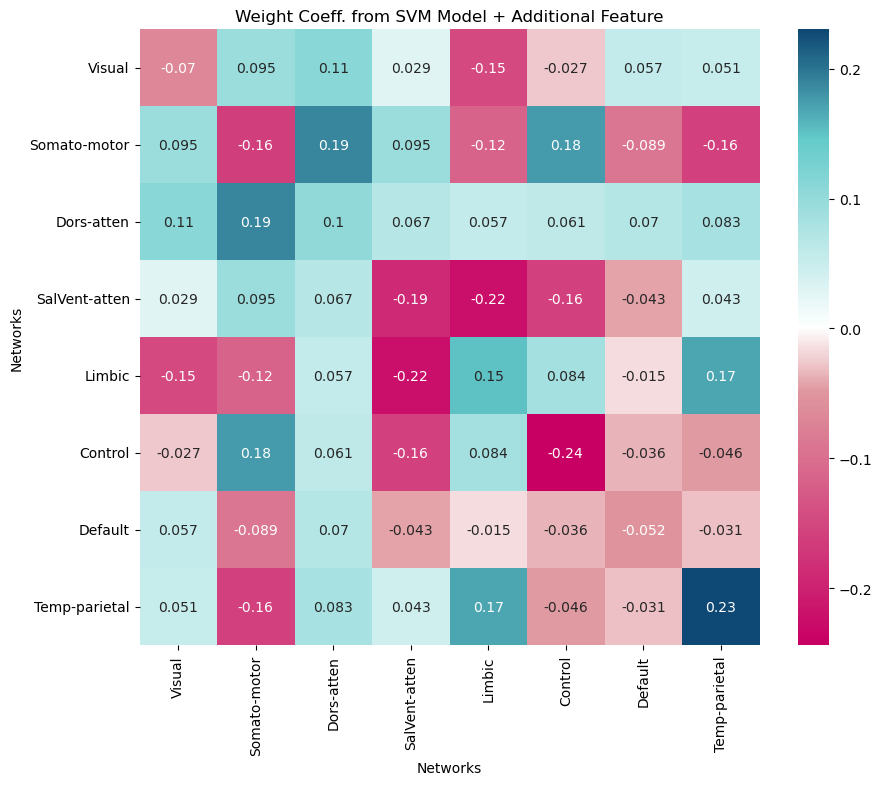

In [93]:
# generate a heatmap plot of weight_rearrange
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
import numpy as np


# Define a custom colormap
colors = [(0, '#c80064'), (0.4,'#df979e'), (0.5, 'white'),(0.8,'#64caca'), (1, '#003366')]  # pink to white to blue
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Create a heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(weight_rearrange, annot=True, cmap=custom_cmap, cbar=True, center=0,)

# Add title and labels
plt.title('Weight Coeff. from SVM Model + Additional Feature')
plt.xlabel('Networks')
plt.ylabel('Networks')

# Save the plot as an .svg file
plt.savefig('C:\\Users\\natas\\OneDrive - The University of Sydney (Staff)\\Postdoc_Rob\\Analysis\\Graph_Theory\\schaef_400\\FC\\weight_coeffs_svm_within_across_nets_il8diff.svg', format='svg')
# Show the plot
plt.show()

Rerunning the above code - but for determining imbalances in the dataset

- attempt class_weight=balanced
- SMOTE
- run cross-validation of most appropriate model fitting to data